In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [11]:
#Modelo SIR
def derivadas(y:list, tiempo:list, N:int, beta:float ,alpha:float) -> list:
        '''
        Funcion del modelo SIR
        Entrada:
                y: Lista con los susceptibles, infectados y recuperados
                tiempo: tiempo en el cual transcurre el fenomeno
                N: Poblacion total
                beta: Tasa de transmision 
                alpha: Tasa de recuperación 
        Salida:
                dSdt, dIdt, dRdt: valores de las derivadas de los 
                suceptibles, infectados y recuperdados, respectivamente
        '''
        S, I, R = y
        dSdt = -beta*S*(I/N)
        dIdt = beta*S*(I/N) - alpha*I
        dRdt = alpha*I
        return dSdt, dIdt, dRdt

#Casos por semana
def casos_semana(casos_totales:list) -> list:
        '''
        Funcion que dada una lista con casos acumulados
        por semana, cuenta los casos aislados por semana

        Entrada: 
                casos_totales: Lista que contiene los 
                casos acumulados

        Salida:
                casos_semana: Lista que contienen los 
                casos aislados por semana
        '''
        casos_semana = [casos_totales[0]]
        for i in range(len(casos_totales)-1):
                casos_semana.append(casos_totales[i+1]-casos_totales[i])
        return casos_semana


def L2(valor_real:list,valor_pred:list) -> float:
        '''
        Funcion que calcula la norma L2 dados los valores reales
        y las predicciones
        Entrada:
                valor_real: Observaciones
                valor_pred: Predicciones
        Salida:
                l2: Norma L2 calculada
        '''
        l2 = np.sum(np.power((valor_real-valor_pred),2))
        return l2


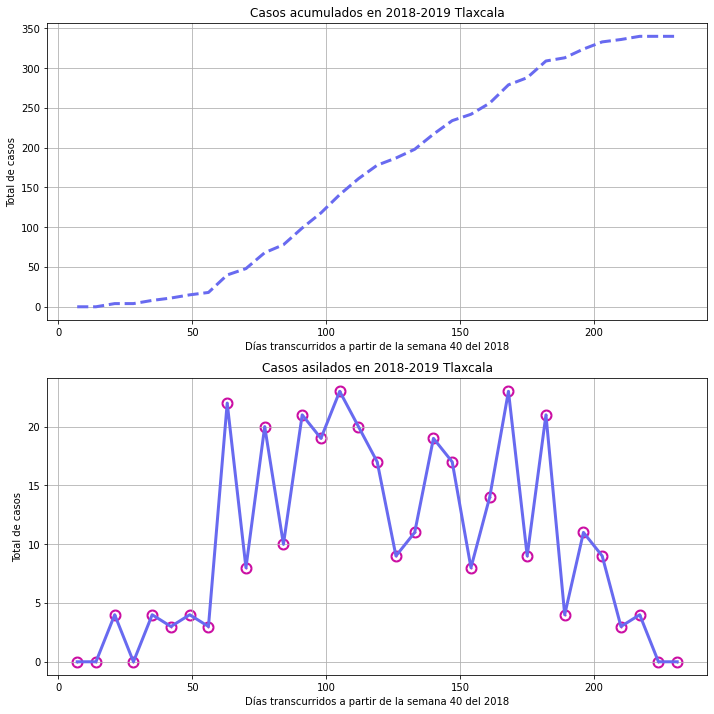

In [12]:
# Datos de casos de influenza acumulados por semana en Tlaxcala
casos_ac_2018_19 = np.array([0, 0, 4, 4, 8, 11, 15, 18, 40, 48, 68, 78, 99,
                    118, 141, 161, 178, 187, 198, 217, 234, 242,
                    256, 279, 288, 309, 313, 324, 333, 336, 340, 
                    340, 340])

#vector tiempo
x = np.linspace(1, len(casos_ac_2018_19), len(casos_ac_2018_19))*7

#obtenemos los casos aislados
casos_ai_inf = np.array(casos_semana(casos_ac_2018_19))

# Grafica de los datos
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))

ax1.plot(x, casos_ac_2018_19, color = '#686AF0', linewidth = 3, linestyle = '--')
ax1.set_title('Casos acumulados en 2018-2019 Tlaxcala')
ax1.set_xlabel('Días transcurridos a partir de la semana 40 del 2018')
ax1.set_ylabel('Total de casos')
ax1.grid(True)

ax2.plot(x, casos_ai_inf, color = '#686AF0', linewidth = 3)
ax2.set_title('Casos asilados en 2018-2019 Tlaxcala')
ax2.scatter(x, casos_ai_inf, color = '#CB0FA3', linewidth = 10, s=4)
ax2.set_xlabel('Días transcurridos a partir de la semana 40 del 2018')
ax2.set_ylabel('Total de casos')
ax2.grid(True)

#Espacio entre ambas graficas
fig.tight_layout(pad=1)
plt.show()


# Grid Search

beta = 230.00039393939394, alpha = 229.96262626262626


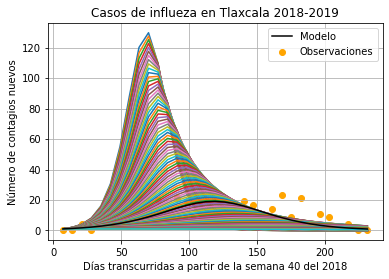

In [21]:
#Condiciones iniciales
#Población de Tlaxcala
N = 1342000000
#Numero de contagios iniciales y recuperados iniciales
I0, R0 = 1, 0
#Numero de suceptibles
S0 = N - I0 - R0
#tiempo en semanas

#valores que van a tomar alpha y beta
alphavals=np.linspace(229.9, 230, 100)
betavals=np.linspace(230, 230.001, 100)

#lista que guarda todos los parámetros intentados
params=[]
#lista que guarda el error de cada parámetro
cost=[]

#grid search
for ii in range(len(alphavals)):
    for jj in range(len(betavals)):
        #solucion del sistema
        sir = odeint(derivadas, [S0, I0, R0], x,  args = (N, betavals[jj], alphavals[ii]))
        S, I, R = sir.T
        #tomamos los infectados predecidos
        prediccion = I
        #calculamos el error
        cost.append(L2(casos_ai_inf,prediccion))
        #guardamos los parametros
        params.append([betavals[jj], alphavals[ii]])
    plt.plot(x, prediccion)
    # print([betavals[jj], alphavals[ii]])
#buscamos el error minimo y los parametros que dan ese error minimo
L1N=np.asarray(cost)/np.max(np.abs(np.asarray(cost)))
idx1=np.where(np.min(L1N)==L1N)[0]
print(f'beta = {params[idx1[0]][0]}, alpha = {params[idx1[0]][1]}')

#calculamos las solucion que da el minimo error
modelo = odeint(derivadas, [S0, I0, R0], x, args = (N, params[idx1[0]][0],params[idx1[0]][1]))

susc, inf, rec = modelo.T

plt.plot(x, inf, color = 'black', label = 'Modelo')
plt.scatter(x, casos_ai_inf, color = 'orange', label = 'Observaciones')
plt.title('Casos de influenza en Tlaxcala 2018-2019')
plt.xlabel('Días transcurridas a partir de la semana 40 del 2018')
plt.ylabel('Número de contagios nuevos')
plt.grid(True)
plt.legend()
plt.savefig('2018-2019.png')
plt.show()

# Validación del modelo

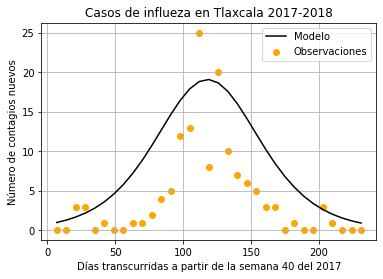

In [14]:
# temporada 2017-2018
casos_acu_2017_18 = np.array([0, 0, 3, 6, 6, 7, 7, 7, 8, 9, 11,
                            15, 20, 32, 45, 70, 78, 98, 108, 115, 121, 126,
                            129, 132, 132, 133, 133, 133, 136, 137, 137, 137, 137])

casos_ai_2017_18 = np.array(casos_semana(casos_acu_2017_18))

N = 1342000000
I0, R0 = 1, 0
S0 = N - I0 - R0

modelo_2017_18 = odeint(derivadas, [S0, I0, R0], x, args = (N, 230,229.96))

susc, inf, rec = modelo.T

plt.plot(x, inf, color = 'black', label = 'Modelo')
plt.scatter(x, casos_ai_2017_18, color = 'orange', label = 'Observaciones')
plt.title('Casos de influenza en Tlaxcala 2017-2018')
plt.xlabel('Días transcurridas a partir de la semana 40 del 2017')
plt.ylabel('Número de contagios nuevos')
plt.grid(True)
plt.legend()
plt.show()


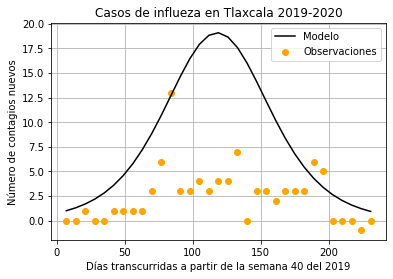

In [15]:
# temporada 2017-2018
casos_acu_2019_20 = np.array([0, 0, 1, 1, 1, 2, 3, 4, 5, 8, 14,
                                27, 30, 33, 37, 40, 44, 48, 55, 55, 58, 61,
                                63, 66, 69, 72, 78, 83, 83, 83, 83, 82, 82])

casos_ai_2019_20 = np.array(casos_semana(casos_acu_2019_20))

N = 1342000000
I0, R0 = 1, 0
S0 = N - I0 - R0

modelo_2019_20 = odeint(derivadas, [S0, I0, R0], x, args = (N, 230,229.96))

susc, inf, rec = modelo.T

plt.plot(x, inf, color = 'black', label = 'Modelo')
plt.scatter(x, casos_ai_2019_20, color = 'orange', label = 'Observaciones')
plt.title('Casos de influenza en Tlaxcala 2019-2020')
plt.xlabel('Días transcurridas a partir de la semana 40 del 2019')
plt.ylabel('Número de contagios nuevos')
plt.grid(True)
plt.legend()
plt.show()